# Predicción de Cancer de mama


### Objetivo
Usaremos un flujo de trabajo ML para diagnosticar el cáncer como benigno (no se expande al resto del cuerpo) o maligno (se expande al resto del cuerpo). La idea es proporcionar un detección temprana del cancer para evitar su expansión

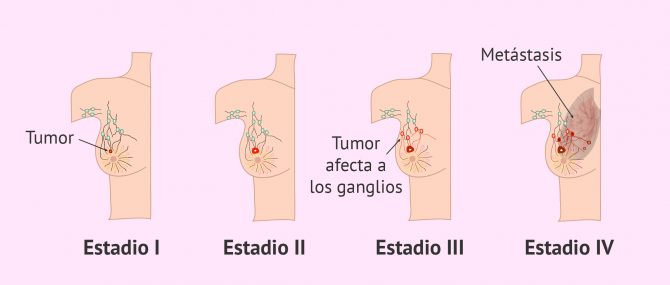

Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

La idea de la primera clase es aprender a realizar una exploración exhaustiva de los datos. Posteriormente se aprenderá a aplicar técnicas de selección de características. De evaluará el/los modelos aplicando y sin aplicar técnicas de Feature Selection y compararemos resultados.

## Preparar entorno de trabajo

### Crear entorno virtual (Conda/Python env)

Una vez creado activamos el entorno con 'conda activate myentorno' para instalar la librerías necesarias

### Instalamos las librerías necesarias

Para instalar las librerías podemos hacerlo mediante "pip install" o "conda install"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Paso 1: Adquisición de los datos

In [3]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [4]:
# Observación de todos los elementos del dataset
# display(breast_cancer)

In [5]:
# Elementos del dataset
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# print(breast_cancer.DESCR[27:3130])

In [7]:
# Observación de variables target
# print(breast_cancer.data)
# print(breast_cancer.target)
print(breast_cancer.target_names)

['malignant' 'benign']


In [8]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
print(breast_cancer.filename)
print(breast_cancer.data_module)

breast_cancer.csv
sklearn.datasets.data


### Lectura de los datos
Crearemos un dataframe y lo rellenaremos con cada una de las "features" del dataset

In [10]:
# cargamos los datos en un dataframe 
df_features = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
# Obtenemos información general del dataset
# df_features.info()

In [11]:
df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Lectura de la variable "target"

In [12]:
# 1 - Benigno
# 0 - Maligno
df_target = pd.DataFrame(breast_cancer.target, columns=['target'])
# df_target.head()

In [13]:
df_target['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

Según la descripción del conjunto de datos, la distribución de la variable objetivo es: 212 - Maligno, 357 - Benigno. Por lo tanto, "benign" y "maglinant" se presentan como 1 y 0, respectivamente.

Para empezar a trabajar concatenamos ambos dataframes: características (Features) y variable objetivo (target)

In [14]:
df = pd.concat([df_features, df_target], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Paso 2: Preprocesamiento de los datos

Comprobamos si los datos necesitan ser pre-procesados. 

Ahora necesitaríamos estandarizar nuestros datos antes de comenzar a trabajar pero ya lo hemos hecho previamente para visualizar los datos correctamente

In [15]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

¡POR SUERTE! 
Los datos han sido limpiados y pre-procesados previamente por lo que podemos saltarnos este paso

## Paso 3: Preparar los datos

In [16]:
from sklearn.model_selection import train_test_split
X = df_features
y = df_target['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state = 2021, stratify=y)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


<AxesSubplot:title={'center':'Distribución conjunto de entrenamiento por "target Class"'}>

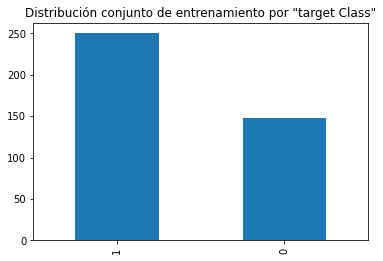

In [18]:
y_train.value_counts().plot(kind='bar',
                                   title='Distribución conjunto de entrenamiento por "target Class"')

<AxesSubplot:title={'center':'Distribución conjunto de test por "target Class"'}>

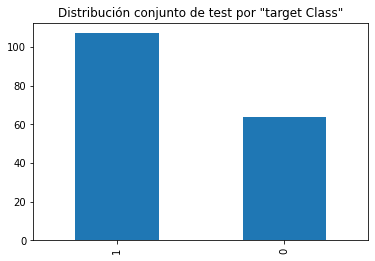

In [19]:
y_test.value_counts().plot(kind='bar',
                                   title='Distribución conjunto de test por "target Class"')

Se observa que la distribución de los datos en ambos conjuntos es igual gracias a la función "stratify"

### Escalar los datos 

Muchos algoritmos de aprendizaje automático funcionan mejor cuando las características están en una escala relativamente similar y cerca de la distribución normal. MinMaxScaler, RobustScaler, StandardScaler y Normalizer son métodos scikit-learn para preprocesar datos para el aprendizaje automático. El método que necesita, si corresponde, depende de su tipo de modelo y los valores de sus características.

##### ¿Por qué escalar, estandarizar o normalizar?

Muchos algoritmos de aprendizaje automático funcionan mejor o convergen más rápido cuando las características están en una escala relativamente similar y / o cerca de la distribución normal. Ejemplos de tales familias de algoritmos incluyen:

- linear and logistic regression
- nearest neighbors
- neural networks
- support vector machines with radial bias kernel functions
- principal components analysis
- linear discriminant analysis

##### Concluyendo:
Escalamos para controlar el hecho de que diferentes variables se miden en diferentes escalas. Escalamos para que cada predictor pueda tener una "lucha justa" entre sí para decidir la importancia.

In [20]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Escalador Estandar 
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

# Escalador MinMaxScaler 
# ms = MinMaxScaler()
# X_train_scaled = ms.fit_transform(X_train)
# X_test_scaled = ms.transform(X_test)
# y_train = np.array(y_train)

## Paso 4: Selección del modelo

### Random Forest Classification

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
%timeit rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

111 ms ± 604 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


1.0

In [22]:
# Predección en el conjunto de test
y_pred = rfc.predict(X_test_scaled)

##### Evaluación del modelo

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 62   2]
 [  2 105]]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



f1 score (macro): 0.9812122321919062
f1 score (micro): 0.9824561403508771
f1 score (weighted): 0.9824278697109006
Accuracy:  0.9824561403508771
recall_score 0.9797021028037383
ROC AUC 0.9797021028037383


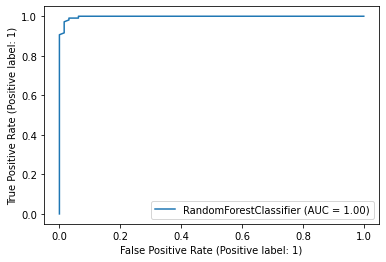

In [23]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score, plot_roc_curve

print("f1 score (macro):", f1_score(y_test, y_pred, average='macro')) 
print("f1 score (micro):", f1_score(y_test, y_pred, average='micro'))
print("f1 score (weighted):",f1_score(y_test, y_pred, average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred, normalize=True))
print("recall_score", recall_score(y_test, y_pred, average='macro'))
print("ROC AUC", roc_auc_score(y_test, y_pred))
plot_roc_curve(rfc, X_test_scaled, y_test) 

## Hiperparametrización
Los hiperparámetros se pueden considerar como "configuraciones" para un modelo. La configuración perfecta para un conjunto de datos no será la misma para otro, por lo que tenemos que "ajustar" el modelo.

Primero, podemos comenzar con RandomSearchCV para considerar una amplia gama de valores. 

Todos los hiperparámetros de Random Forest se pueden encontrar en la documentación:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Nosotros vamos a empezar "tuneando" los siguientes parámetros:
    
- n_estimators: el número de "árboles"
- max_features: el número de características en cada división.
- max_depth: profundidad de cada árbol de decisión
- min_samples_split: el número mínimo de observaciones requeridas antes de que un nodo de un árbol pueda dividirse.
- min_samples_leaf: el número mínimo de observaciones requeridas en cada hoja en los extremos de cada árbol.
- bootstrap: si se usa bootstrap o no para proporcionar datos a cada árbol en Random Forest. (Bootstrapping es un muestreo aleatorio del conjunto de datos con reemplazo).

### Random Search

In [24]:
from sklearn.model_selection import RandomizedSearchCV

# Definimos el modelo
rfc = RandomForestClassifier()

# [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
# [2, 7, 12, 18, 23, 28, 34, 39, 44, 50]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]

bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Se ejecutará 100 veces por el nº de cross validations
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)


rs.fit(X_train_scaled, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 600,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

Con n_iter = 100 y cv = 3, creamos 300 modelos Random Forest, muestreando aleatoriamente combinaciones de los hiperparámetros que hemos configurado. Podemos llamar a "best_params_" para obtener los parámetros del modelo de mejor rendimiento. 

Aunque es aconsejable visualizar las mejores configuraciones del ranking:

In [25]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)

rs_df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.531067,0.010055,0.035280,0.000341,600,23,2,sqrt,15,False,"{'n_estimators': 600, 'min_samples_split': 23,...",0.969925,0.962406,0.924242,0.952191,0.020000,1
1,0.623243,0.006687,0.041353,0.000272,700,12,2,sqrt,13,False,"{'n_estimators': 700, 'min_samples_split': 12,...",0.969925,0.969925,0.916667,0.952172,0.025106,2
2,0.603805,0.003939,0.041423,0.000270,700,2,2,log2,11,True,"{'n_estimators': 700, 'min_samples_split': 2, ...",0.969925,0.962406,0.916667,0.949666,0.023535,3
3,0.353325,0.008431,0.024021,0.000453,400,23,2,sqrt,14,False,"{'n_estimators': 400, 'min_samples_split': 23,...",0.969925,0.954887,0.916667,0.947160,0.022419,4
4,0.582359,0.005906,0.045899,0.006315,700,18,7,sqrt,7,False,"{'n_estimators': 700, 'min_samples_split': 18,...",0.962406,0.962406,0.916667,0.947160,0.021562,4


Podemos eliminar los tiempos de ejecución y los resultados de los CV por separados. Lo que queremos observar es la combinación de parámetros y la media de los resultados de CV.

In [26]:
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(5)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,600,23,2,sqrt,15,False,0.952191,1
1,700,12,2,sqrt,13,False,0.952172,2
2,700,2,2,log2,11,True,0.949666,3
3,400,23,2,sqrt,14,False,0.947160,4
4,700,18,7,sqrt,7,False,0.947160,4


Ahora, creemos diagramas de barras de cada hiperparámetro con respecto a la media los resultados de CV de los modelos realizados en cada valor, para ver qué valores tuvieron más éxito en promedio:

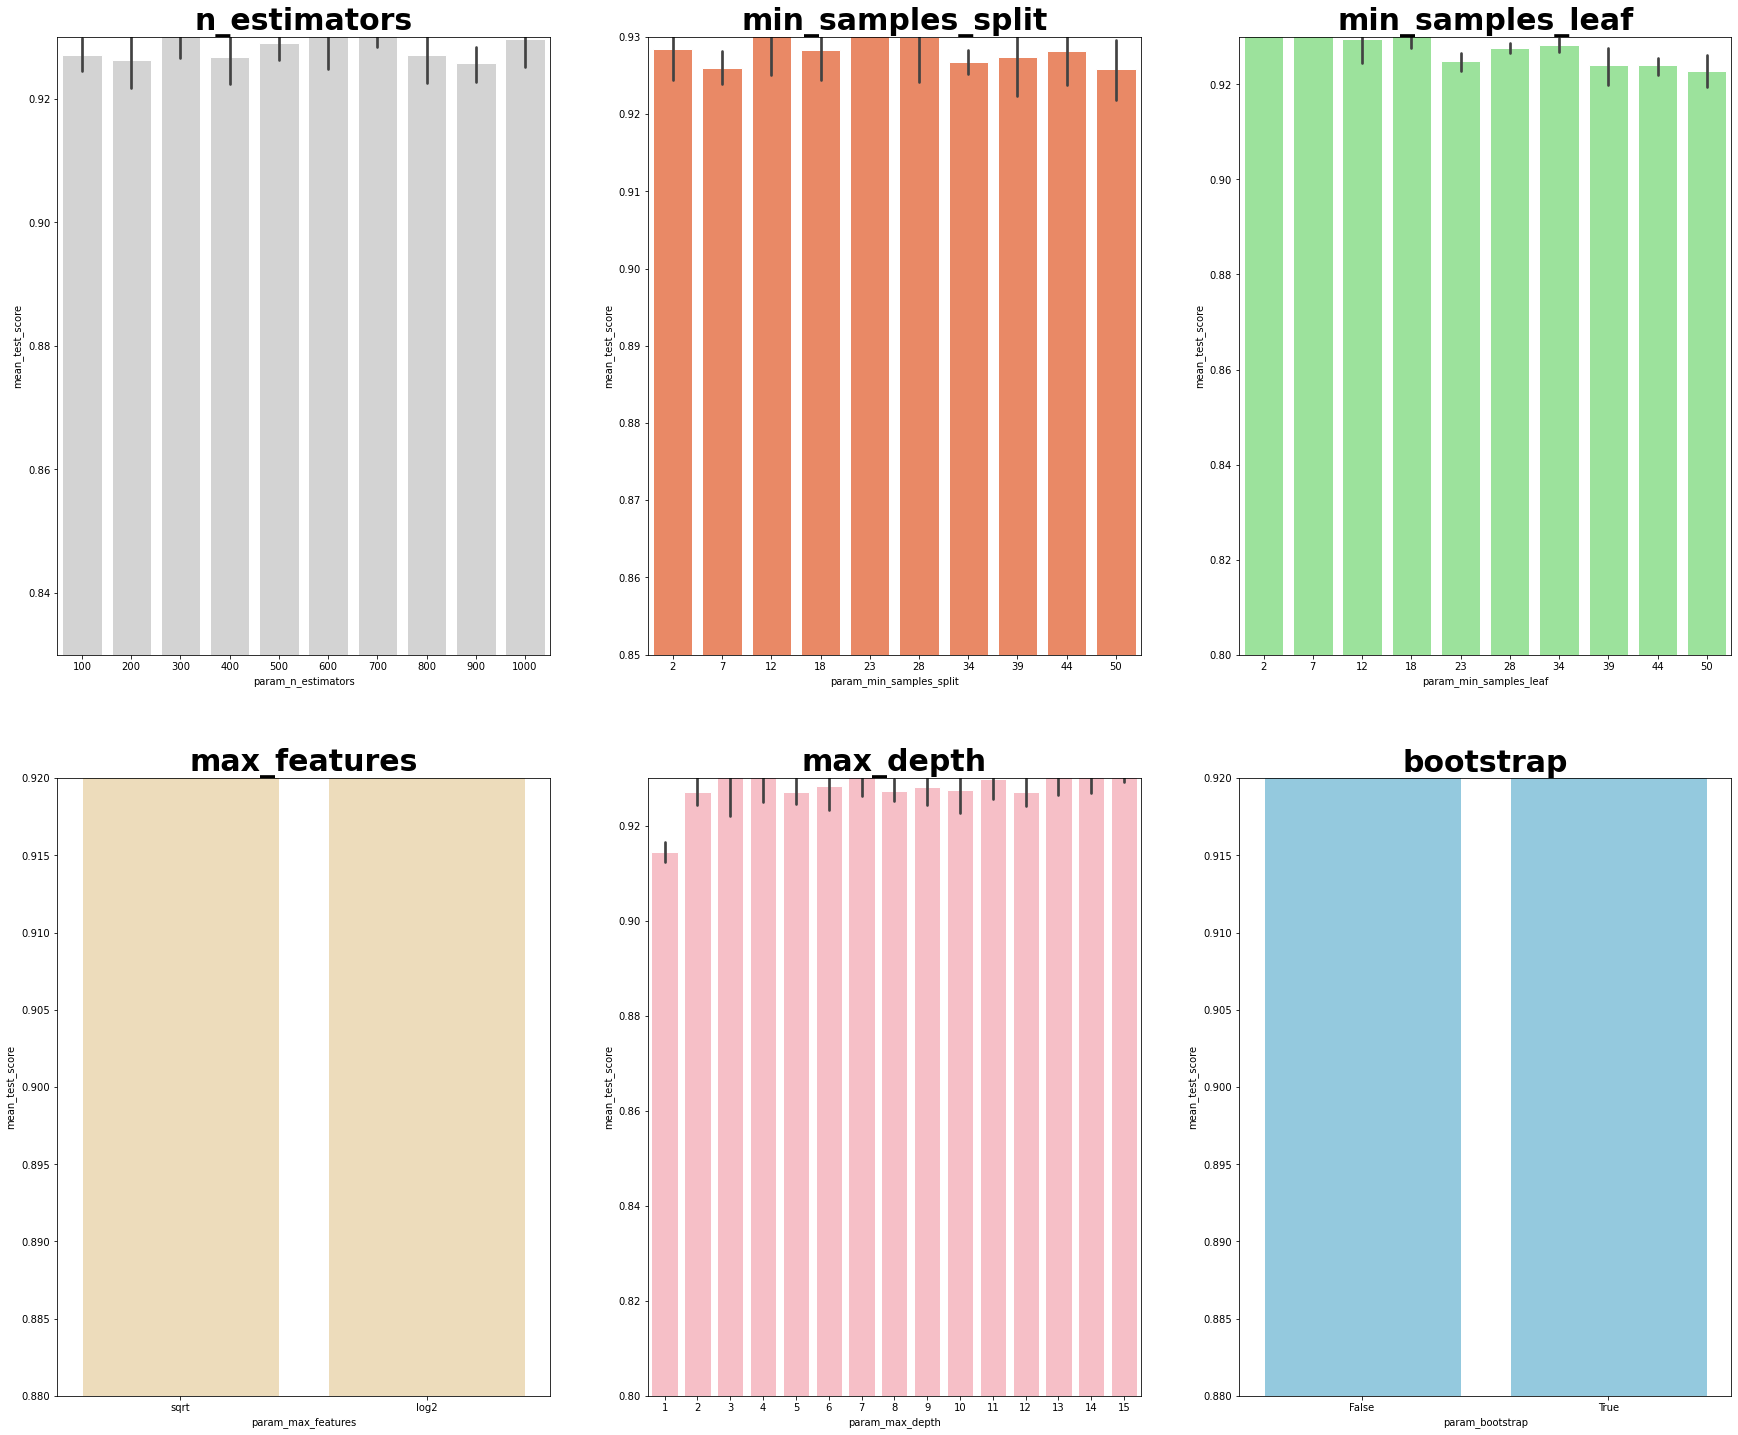

In [27]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,.93])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,.93])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.88,.92])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

Al observar los gráficos anteriores, podemos extraer información sobre qué tan bien se desempeñó en promedio cada valor para cada hiperparámetro.

n_estimators: 300, 500, 700 parecen tener las puntuaciones medias más altas.

min_samples_split: los valores más pequeños como 2 y 7 parecen tener puntuaciones más altas. También hay puntuaciones altas en 23. Podemos probar algunos valores por encima de 2 y algunos valores alrededor de 23.

min_samples_leaf: los valores más pequeños parecen correlacionarse con puntuaciones más altas ... podemos probar valores entre 2 y 7.

max_features: "sqrt" tiene la puntuación media más alta.

max_depth: no hay un patrón claro, pero los valores de 2, 3, 7, 11, 15 parecen funcionar bien.

bootstrap: "Falso" tiene la puntuación media más alta.

Así que ahora podemos tomar esta información y pasar a la segunda ronda de ajuste de hiperparámetros para limitar aún más nuestras selecciones.

### Grid Search

Después de usar RandomSearchCV, podemos usar GridSearchCV para realizar una búsqueda más refinada de nuestros mejores hiperparámetros. Los hiperparámetros son los mismos, pero ahora realizamos una búsqueda más “exhaustiva” usando GridSearchCV. En GridSearchCV, se prueba cada combinación de valores de hiperparámetros, lo que requiere mucho más poder computacional que RandomSearchCV, donde podemos controlar directamente cuántas iteraciones queremos probar. Por ejemplo, buscar solo 10 valores de parámetros diferentes para cada uno de nuestros 6 parámetros, con una validación cruzada triple, requerirá 10⁶ x 3 = 3.000.000 de ajustes de modelo. Es por eso que realizamos GridSearchCV después de usar RandomSearchCV, para ayudar a limitar nuestra búsqueda primero.

In [28]:
from sklearn.model_selection import GridSearchCV

n_estimators = [300,500,700]
max_features = ['sqrt']
max_depth = [2,3,7,11,15]
min_samples_split = [2,3,4,22,23,24]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gs = GridSearchCV(rfc, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled, y_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


{'bootstrap': False,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500}

In [29]:
rs.best_params_

{'n_estimators': 600,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [31]:
y_pred_gs = gs.best_estimator_.predict(X_test_scaled)

Confusion Matrix:
 [[ 62   2]
 [  1 106]]


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

f1 score (macro): 0.9812122321919062
f1 score (micro): 0.9824561403508771
f1 score (weighted): 0.9824278697109006
Accuracy:  0.9824561403508771
recall_score 0.9797021028037383
ROC AUC 0.9797021028037383


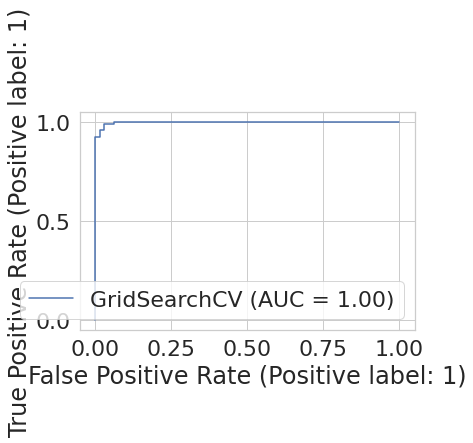

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score, plot_roc_curve


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gs))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred_gs))


print("f1 score (macro):", f1_score(y_test, y_pred_gs, average='macro')) 
print("f1 score (micro):", f1_score(y_test, y_pred_gs, average='micro'))
print("f1 score (weighted):",f1_score(y_test, y_pred_gs, average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred_gs, normalize=True))
print("recall_score", recall_score(y_test, y_pred_gs, average='macro'))
print("ROC AUC", roc_auc_score(y_test, y_pred_gs))
plot_roc_curve(gs, X_test_scaled, y_test) 